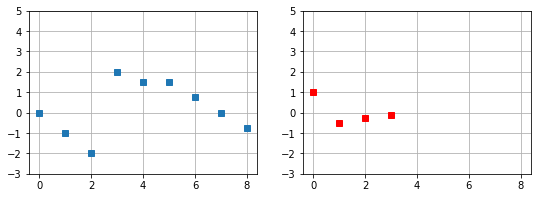

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, -1, -2, 2, 1.5, 1.5, 0.75, 0, -0.75])
h = np.array([1, -0.5, -0.25, -0.1])

plt.figure(figsize=(9, 3))
ax1 = plt.subplot(1, 2, 1)
plt.plot(x, 's')
plt.ylim(-3, 5)
plt.grid()

ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.plot(h, 'rs')
plt.grid()

nsubplots: 9


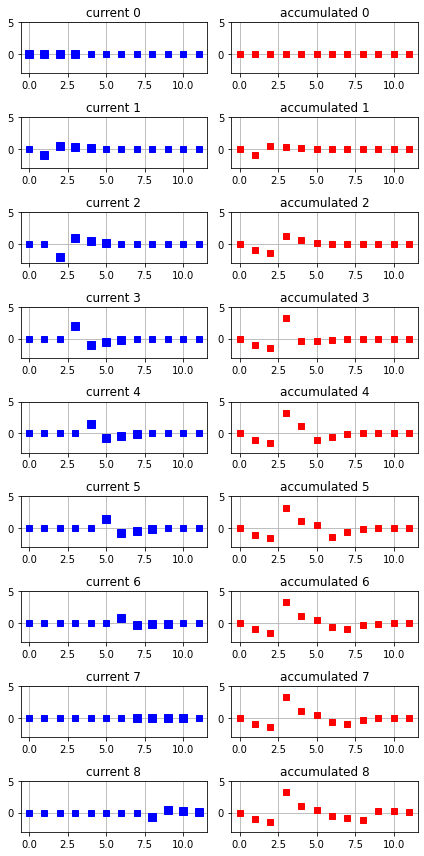

In [40]:
prod_accum = np.zeros(len(x) + len(h) - 1)

nsubplots = len(x)
print(f'nsubplots: {nsubplots}')

plt.figure(figsize=(6, 12))
for k in range(len(x)):
    prod_curr = np.zeros(len(x) + len(h) - 1)
    w = x[k]
    prod_curr[k:k+len(h)] = w * h
    prod_accum = prod_accum + prod_curr

    plt.subplot(nsubplots, 2, 2*k+1)  # NB: sharey=ax1 takes a lot of time, better to use ylim
    plt.title(f'current {k}')
    plt.plot(prod_curr, 'bs')
    plt.plot(range(k, k+4), prod_curr[k:k+4], 'bs', markersize=8)
    plt.ylim(-3, 5)
    plt.grid()

    plt.subplot(nsubplots, 2, 2*k+2)
    plt.title(f'accumulated {k}')
    plt.plot(prod_accum, 'rs')
    plt.ylim(-3, 5)
    plt.grid()

plt.tight_layout()


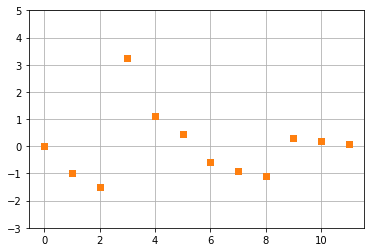

In [41]:
y = np.zeros(len(x) + len(h) - 1)

for n in range(len(y)):
    for k in range(len(x)):
        if n - k in range(len(h)):
            y[n] += x[k] * h[n - k]  # as k increases, we going backward in h

plt.figure()
plt.plot(prod_accum, 's')   # plot accumulated array from the 1st calculation (color: blue)
plt.plot(y, 's')            # integral (color: red)
plt.ylim(-3, 5)
plt.grid()

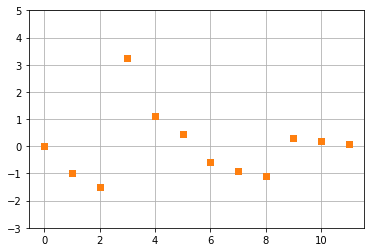

In [44]:
#
#   Confusing version of the previous loop
#

y = np.zeros(len(x) + len(h) - 1)

for n in range(len(x)):
    for k in range(len(h)):
        y[n + k] += x[n] * h[k]  # the n-k dependence is not evident in this version of the loop

plt.figure()
plt.plot(prod_accum, 's')   # plot accumulated array from the 1st calculation (color: blue)
plt.plot(y, 's')            # integral (color: red)
plt.ylim(-3, 5)
plt.grid()